<a href="https://colab.research.google.com/github/paliwalpiyush151/Molecular_Simulations/blob/main/Copy_of_Mini_Project_1_SelfAvoiding_RW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**_Mini Project-1_ : Self Avoided Random-Walk**
## Name : Piyush Paliwal
## Roll No.: 17180

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import random
import math 
import time

### **PART:A - Generating Polymer using SARW :** 
## (1) Generate 20 polymers SARW procedure ensuring that in each polymer NO atom falls outside the box of size 50 x 50 x 50.

In [ ]:
N = [10,20,40,60,80]   # Number of monomers in each polymer
z,b,c,d,e = list(),list(),list(),list(),list()
f,g,h,i,j = list(),list(),list(),list(),list()
dis = [z,b,c,d,e]
tt = [f,g,h,i,j]
kp =[[],[],[],[],[]]    # 

for k in range(5):
  for j in range(20):
    dum = list()
    pol_cor = list()
    sp = np.array([0,0,0])
    pol_cor.append(sp)
    for i in range(N[k]):
      rep = 2
      st = time.time()
      while (rep!=0):
        a = [[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]]
        nxt_dr = np.array(random.choice(a))
        nxt_pt = sp + nxt_dr

        if (abs(nxt_pt[0])<=25 and abs(nxt_pt[1])<=25 and abs(nxt_pt[2])<=25):

          for i in range(len(pol_cor)): 
            if (nxt_pt == np.array(pol_cor[i])).all():
              rep = rep + 1 
              break
            else : 
              rep = 0
          
          if (rep != 0):
            continue
          else:
            break
          if (rep == 0):
            break
       
        else: 
          continue
      et = time.time()
      time_taken = et-st 
      dum.append(time_taken)
      sp = nxt_pt
      pol_cor.append(sp)

    m = 0
    for p in range(N[k]):
      m = m + dum[p]
    m = m/N[k]
    tt[k].append(m)
    d = math.sqrt(pol_cor[N[k]][0]**2 + pol_cor[N[k]][1]**2 + pol_cor[N[k]][2]**2)
    dis[k].append(d)
    kp[k].append(pol_cor)

## Visualizing Polymers of different lengths: Here we are visualizing only first polymer (out of 20 polymers of same lenght) with different monomer units.   

### Note: you can zoom in or rotate the image to analyse polymer formed by SARW. 

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

x,y,z = [[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]]
for j in range(len(N)):
  for i in range(N[j]):
    x[j].append(kp[j][0][i][0])
    y[j].append(kp[j][0][i][1])
    z[j].append(kp[j][0][i][2])

for i in range(len(N)):
  fig = go.Figure(data=go.Scatter3d(x=x[i], y=y[i], z=z[i],marker=dict(size=4,color=z,colorscale='Viridis',),line=dict(color='darkblue',width=2)))

  fig.update_layout(width=800,height=700,autosize=False,scene=dict( camera=dict( up=dict(x=0,y=0,z=1),eye=dict(x=0,y=1.0707,z=1,)),
                                                                  aspectratio = dict( x=1, y=1, z=0.7 ),aspectmode = 'manual'),)
  print('\n\t\t\t\t\t Polymer with chain lenght %d \n'%(N[i]))
  fig.show()
  


					 Polymer with chain lenght 10 




					 Polymer with chain lenght 20 




					 Polymer with chain lenght 40 




					 Polymer with chain lenght 60 




					 Polymer with chain lenght 80 



### Q.(2) Plot a histogram of the end-to-end distances $R_{N}$ (in units of a) obtained from the 20 polymers.

### $R_{N}$ = [($x_{N-1}$-$x_{0}$)$^2$ + ($y_{N-1}$-$y_{0}$)$^2$ + ($z_{N-1}$-$z_{0}$)$^2$]$^{1/2}$ 
### where ($x_{N-1}$, $y_{N-1}$, $z_{N-1}$) & ($x_{0}$, $y_{0}$, $z_{0}$) are coordinates of $N^{th}$ and first monomer unit of polymer.

Histogram of end to end distance N =  10


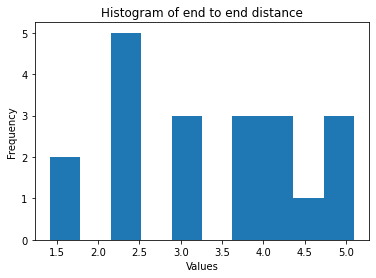

Histogram of end to end distance N =  20


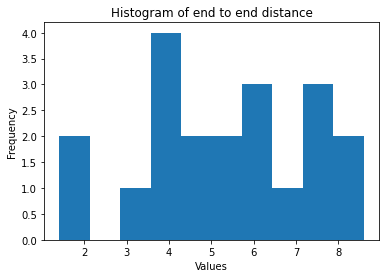

Histogram of end to end distance N =  40


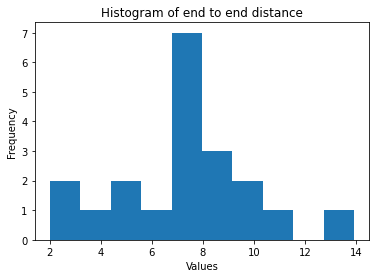

Histogram of end to end distance N =  60


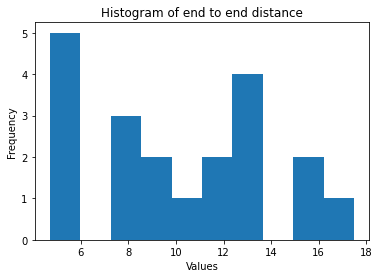

Histogram of end to end distance N =  80


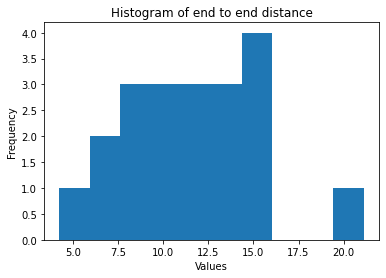

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(dis)):
  print("Histogram of end to end distance N = ",N[i])
  n, bins, patches=plt.hist(dis[i])
  plt.xlabel("Values")
  plt.ylabel("Frequency")
  plt.title("Histogram of end to end distance")
  plt.show()

### Q.(3) : Calculate the average end-to-end distance $<R_N>$ and its variance in the distribution, $<{R_N}^2>$.
###  $<R_{N}>$ =$\sum_{i=0}^{N-1}$ $\frac{1}{N}R_{Ni}$
###  $<{R_N}^2>$ = $\sum_{i=0}^{N-1}$ $\frac{1}{N-1}(R_{Ni}  - <R_N>)^2$ 
### In our case, we have generated 20 polymers for each monomer length. So, N = 20 and $R_{Ni}$ is end to end distance of ${i^{th}}$ polymer. 

### Link: https://www.eng.uc.edu/~beaucag/Classes/IntrotoPolySci/End-to-endDistance.htm 

## One doubt: As per the theory of polymer, <R> is zero. How to justify this result?

In [ ]:
R_avg = list()
r_avg = 0
N = [10,20,40,60,80]
for k in range(5):
  for i in range(20):
    r_avg = r_avg + dis[k][i]
  r_avg = r_avg/20
  R_avg.append(r_avg)

for i in range(len(R_avg)):
  print('Average distance is: ', R_avg[i])

Average distance is:  3.3921058410739553
Average distance is:  5.567942637276937
Average distance is:  7.585196321007094
Average distance is:  10.57762250837861
Average distance is:  12.152241695686929


### Variance is same for all the polymers !! there is some problems???

In [ ]:
R_sqr = list()
for i in range(5):
  r_sqr = 0
  for i in range(20):
    r_sqr = r_sqr + (dis[k][i]-R_avg[k])**2
  r_sqr = r_sqr/19
  R_sqr.append(r_sqr)
R_sqr

[16.397057156172142,
 16.397057156172142,
 16.397057156172142,
 16.397057156172142,
 16.397057156172142]

### **4. Compute the average time taken to add a new atom to the polymer $(t_N)$.** 
### $t_N$ = $\sum_{i=1}^{N}\frac{1}{N} {t_i}$ where ${t_i}$ is the time taken to add ${i^{th}}$ monomer to $(i-1)^{th}$ monomer.    

In [ ]:
# time average over all the polymer length: 
t_avg = list()
for k in range(len(tt)):
  p = 0
  for i in range(20):
    p = p + tt[k][i]
  p = p/20
  t_avg.append(p)
print(t_avg)

[4.5264959335327146e-05, 4.63634729385376e-05, 8.821457624435426e-05, 0.0001271901528040568, 0.00016266122460365296]


### **(B) Plots of $<R_N>$, $<R_N^2>$, $t_N$  Vs N:** 

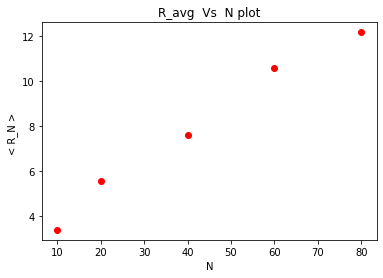

____________________________________________________


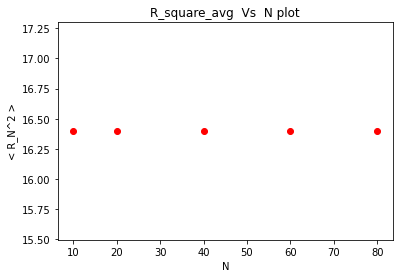

____________________________________________________


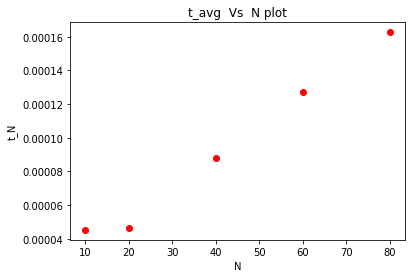

In [ ]:
# R_avg, R_sqr,t_avg
import matplotlib.pyplot as plt
plt.plot(N, R_avg, 'ro')
plt.xlabel("N")
plt.ylabel("< R_N > ")
plt.title("R_avg  Vs  N plot")
plt.savefig('1.png')
plt.show()
print("____________________________________________________")
plt.plot(N, R_sqr, 'ro')
plt.xlabel("N")
plt.ylabel("< R_N^2 >")
plt.title("R_square_avg  Vs  N plot")
plt.savefig('2.png')
plt.show()
print("____________________________________________________")
plt.plot(N, t_avg, 'ro')
plt.xlabel("N")
plt.ylabel("t_N")
plt.title("t_avg  Vs  N plot")
plt.savefig('3.png')
plt.show()

In [ ]:
#from google.colab import files
#files.download("2.png")

### **(C) Understaing from project:**
### Read about polymer theory and validate results obtained with theory. find some applications these results.  

### **Code to visualize the Polymer chain:** 

In [ ]:
x,y,z = [],[],[]
for i in range(len(pol_cor)):
  x.append(pol_cor[i][0])
  y.append(pol_cor[i][1])
  z.append(pol_cor[i][2])

In [ ]:
import plotly.express as px
#df = px.data.iris()
px.scatter_3d (x=x, y=y, z=z,size_max=10)
px.line_3d(df,x=x,y=y,z=z)
#fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

for i in range(2):
  fig = go.Figure(data=go.Scatter3d(x=x, y=y, z=z,marker=dict(size=4,color=z,colorscale='Viridis',),line=dict(color='darkblue',width=2)))

  fig.update_layout(width=800,height=700,autosize=False,scene=dict( camera=dict( up=dict(x=0,y=0,z=1),eye=dict(x=0,y=1.0707,z=1,)),
                                                                  aspectratio = dict( x=1, y=1, z=0.7 ),aspectmode = 'manual'),)
  fig.show()

#fig = go.Figure(data=go.Scatter3d(x=x, y=y, z=z,marker=dict(size=4,color=z,colorscale='Viridis',),line=dict(color='darkblue',width=2)))

#fig.update_layout(width=800,height=700,autosize=False,scene=dict( camera=dict( up=dict(x=0,y=0,z=1),eye=dict(x=0,y=1.0707,z=1,)),
#                                                                 aspectratio = dict( x=1, y=1, z=0.7 ),aspectmode = 'manual'),)
#fig.show()

In [ ]:
dum = list()
pol_cor = list()
sp = np.array([0,0,0])
pol_cor.append(sp)
for i in range(700):
  rep = 2
  st = time.time()
  while (rep!=0):
    a = [[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]]
    nxt_dr = np.array(random.choice(a))
    nxt_pt = sp + nxt_dr

    if (abs(nxt_pt[0])<=25 and abs(nxt_pt[1])<=25 and abs(nxt_pt[2])<=25):
      for i in range(len(pol_cor)): 
        if (nxt_pt == np.array(pol_cor[i])).all():
          rep = rep + 1 
          break
        else : 
          rep = 0
      
      if (rep != 0):
        continue
      else:
        break
      if (rep == 0):
        break
    
    else: 
      continue
  et = time.time()
  time_taken = et-st 
  dum.append(time_taken)
  sp = nxt_pt
  pol_cor.append(sp)

In [ ]:
#pol_cor

In [ ]:
def checkInFirst(a, b):
    #getting count
  c = 0
  for i in range(len(b)):
    for j in range(len(a)):
      if (b[i]==a[j]):
        c = c + 1
      
  if c == len(b):
    return True

  else:
    return False


a = [1, 2,4,5]
b = [1, 2,3]
  
#Calling function
res = checkInFirst(a, b)
print(res)

In [ ]:
import numpy as np
from array import *
import random
a = [[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]]
nxt_dr =np.array(random.choice(a))
##------how to avoid trapping the polymer in loop ----------
dk = [(a[0]+nxt_dr).tolist(), (a[1]+nxt_dr).tolist(),(a[2]+nxt_dr).tolist(),(a[3]+nxt_dr).tolist(),(a[4]+nxt_dr).tolist(),(a[5]+nxt_dr).tolist()]
print(dk)
print(a)
res = checkInFirst(dk,a)
print(res)

In [ ]:
(a[0]+nxt_dr).tolist()

In [ ]:
# simple code to implement Runs
# test of randomnes

import random
import math
import statistics
import numpy as np

def runsTest(l, l_median):

	runs, n1, n2 = 0, 0, 0
	
	# Checking for start of new run
	for i in range(len(l)):
		
		# no. of runs
		if (l[i] >= l_median and l[i-1] < l_median) or \
				(l[i] < l_median and l[i-1] >= l_median):
			runs += 1
		
		# no. of positive values
		if(l[i]) >= l_median:
			n1 += 1
		
		# no. of negative values
		else:
			n2 += 1

	runs_exp = ((2*n1*n2)/(n1+n2))+1
	stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/ \
					(((n1+n2)**2)*(n1+n2-1)))

	z = (runs-runs_exp)/stan_dev

	return z
	
# Making a list of 100 random numbers
l = []
for i in range(100):
	l.append(np.random.random())
	
l_median= statistics.median(l)

Z = abs(runsTest(l, l_median))

print('Z-statistic= ', Z)


In [ ]:
pol_cor = list()
sp = np.array([0,0,0])
pol_cor.append(sp)
for i in range(20):
  rep = 2
  st = time.time()
  while (rep!=0):
    a = [[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]]
    pal = np.random.randint(6)
    nxt_pt = np.array(a[pal])
  #   nxt_dr = np.array(random.choice(a))
    nxt_pt = sp + nxt_dr

    if (abs(nxt_pt[0])<=25 and abs(nxt_pt[1])<=25 and abs(nxt_pt[2])<=25):

      for i in range(len(pol_cor)): 
        if (nxt_pt == np.array(pol_cor[i])).all():
          rep = rep + 1 
          break
        else : 
          rep = 0
      
      if (rep != 0):
        continue
      else:
        break
      if (rep == 0):
        break
    
    else: 
      continue
  et = time.time()
  time_taken = et-st 
  dum.append(time_taken)
  sp = nxt_pt
  pol_cor.append(sp)

In [ ]:
for i in range(100):
  a = [[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]]
  pal = np.random.randint(6)
  nxt_pt = np.array(a[pal])
  print(nxt_pt)

In [ ]:
pol_cor

In [ ]:
pal